**Computational scaling of SVMs**

Write a python function from which you can generate synthetic datasets of an arbitrary size (e.g. a mixture model of two Gaussians) 

By training SVMs on datasets of different sizes show:

- how the training time scales.

- how the classification time scales (on a sample of 1000 unseen datapoints).

- the accuracy of the classifier (on a sample of 1000 unseen datapoints).

Choose a kernel that you think is appropriate to the task at hand. Come to class with your code and results in a plaintext format suitable for pasting into a poll.



In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from mlxtend.plotting import plot_decision_regions

# Generate Data

In [2]:
def gen_data(N, n_components):
    '''
    Generates synthetic data in the form of 'blobs'.
    Input: N (sample size), n_components (the number of blobs)
    Output: X, Y (datapoints and classes)
    
    Source: https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
    '''
    X, truth = make_blobs(n_samples=N, centers=n_components, 
                          cluster_std = [np.random.choice([2,3,4]) for i in range(n_components)], 
                          random_state=42)
    return X, truth

[]

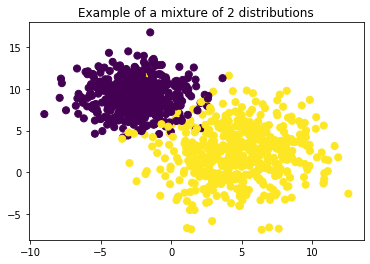

In [4]:
# Example data
n_components = 2
x, y = gen_data(1000, n_components)
plt.scatter(x[:, 0], x[:, 1], s=50, c = y)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.plot()

/Users/annapauxberger/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[]

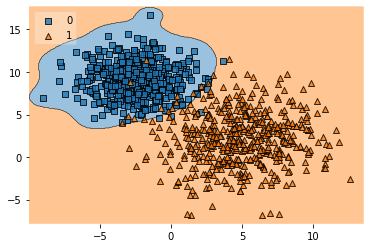

In [6]:
# Example SVM with decision boundary

# Training a classifier
svm_1 = svm.SVC(C=0.5, kernel='rbf')
svm_1.fit(x, y)


# Plotting decision regions
plot_decision_regions(x, y, clf=svm_1, legend=2)
plt.plot()

# Training, timing and scoring the SVM

In [7]:
def get_svm_metrics(x, y):
    '''
    Input: x, y
    Output: training time, prediction time, accuracy
    Splits the data into train and test set,  trains a SVM, predicts accuracy 
    and times training and prediction.
    
    You may choose to split up the following tasks in individual functions. 
    '''
    
    # split data into train and test set
    
    # specify the SVM with its kernel
    
    # time and train (fit) the classifier
    
    # time and predict the train data
    
    # get accuracy score
    
    # return training time, prediction time, accuracy
    
    return training_time, prediction_time, accuracy
    

# Evaluate Metrics

In [9]:
def multiple_metrics(data_sizes, n_components):
    '''
    Input: array of data sizes
    Output: array of dictionaries with data size, training time, classification time and 
    accuracy for each data size
    
    Runs a for loop on all data sizes and 
    '''
    
    d = []
    
    for N in data_sizes:

        (x, y) = gen_data(N, n_components)
        (training_time,  classification_time, accuracy) = get_svm_metrics(x,y)
        
        d.append({
                '1 data_size': N,
                '2 training_time': training_time, 
                '3 classification_time': classification_time,
                '4 accuracy': accuracy
                 })
        
    return d

In [ ]:
# example data sizes and metrics (output not shown)
data_sizes = [10000, 20000, 30000, 40000, 50000]
n_components = 3  # number of classes, blobs
metrics = multiple_metrics(data_sizes, n_components)
pd.DataFrame(metrics)

# END